# 插值原理

## 1.多项式拟合原理

考虑$y=P_n(x)$，其中
$$
P_n(x)=\sum_{i=0}^n a_i x^i=a_0+a_1 x+a_2 x^2+\dots+a_n x^n
$$

那么对于给定的一组序列如下：
| $x_0$ | $x_1$ | ... | $x_n$ |
| - | - | - | - |
| $y_0$ | $y_1$ | ... | $y_n$ |

可知对于任意一个序号$i=0,1,2,3\dots,n$都有：
$$
y_i=a_0+a_1 x+a_2 x^2\dots a_n x^n
$$

写成矩阵形式会有：

$$
\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}_{n+1}

=

\begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n\\
1 & x_1 & x_1^2 & \dots & x_1^n\\
\vdots & \vdots & \vdots & \ddots &\vdots\\
1 & x_n & x_n^2 & \dots & x_n^n
\end{bmatrix}_{(n+1)\times (n+1)}

\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_n
\end{bmatrix}_{n+1}
$$

于是记
$$

\begin{aligned}
\bm{X}&=\begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n\\
1 & x_1 & x_1^2 & \dots & x_1^n\\
\vdots & \vdots & \vdots & \ddots &\vdots\\
1 & x_n & x_n^2 & \dots & x_n^n
\end{bmatrix}

\\
\\

\bm{Y}&=\begin{bmatrix}
y_0\\
y_1\\
\vdots\\
y_n
\end{bmatrix}

\\
\\

\bm{A}&=\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_n
\end{bmatrix}
\end{aligned}
$$

于是可以得到：

$$
\bm{X}^{-1}\bm{Y}=\bm{A}
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def getX(x):
    n=x.size
    X=np.zeros([n,n])
    for i in range(n):
        X[i]=x**i
        pass
    return X.T

def PnFitted(x,y):
    n=x.size
    X=getX(x)
    A=np.linalg.inv(X).dot(y)
    return A

In [13]:
x=np.array([1,2,3,4])
y=7*x**3+5*x**2+x/2+1
a=PnFitted(x,y)
a

array([1. , 0.5, 5. , 7. ])

## 2.插值原理

对于已知$x_i,x_{i+1},y_i,y_{i+1}$的情况，若有$x_i<x<x_{i+1}$，则可以使用近似的线性插值：

$$
y=\frac{x_{i+1}-x}{x_{i+1}-x_i}\cdot x_i+\frac{x-x_i}{x_{i+1}-x_i}\cdot x_{i+1}
$$

如果给定的情况能够包含$i-1,i,i+1$则可以使用二次拟合，给定的越多越能用高次多项式拟合。

但事实上，如果给的点太多，反而会因为“过拟合”导致结果偏差太大，效果甚至不如线性插值更精确。

另外对于不在给定范围内的情况，如$x<x_0$或者$x>x_n$，则可以$x_0,x_1,x_2$进行二次拟合，运用“外拓”的想法求得，但精度不能保证，这点在wolfram语言中有所体现

In [17]:
def Interpoly(xin,x,y):
    if xin in x:
        k=np.argwhere(x==xin)
        return y[k]
    elif xin<x[1]:
        xx=np.array([
            x[0],x[1],x[2]
        ])
        yy=np.array([
            y[0],y[1],y[2]
        ])
        a=PnFitted(xx,yy)
        return a[0]+a[1]*xin+a[2]*xin**2
    elif xin>x[-2]:
        xx=np.array([
            x[-1],x[-2],x[-3]
        ])
        yy=np.array([
            y[-1],y[-2],y[-3]
        ])
        a=PnFitted(xx,yy)
        return a[0]+a[1]*xin+a[2]*xin**2
    else:
        k=0
        while x[k]<xin:
            k+=1
            pass
        xx=np.array([
            x[k-1],x[k],x[k+1]
        ])
        yy=np.array([
            y[k-1],y[k],y[k+1]
        ])
        a=PnFitted(xx,yy)
        return a[0]+a[1]*xin+a[2]*xin**2
    pass

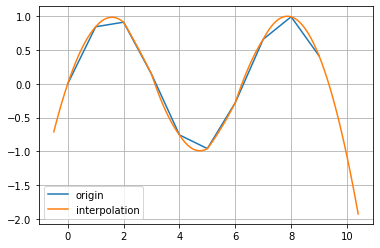

In [24]:
x=np.arange(0,10,1)
y=np.sin(x)
plt.plot(x,y,label='origin')
xx=np.arange(-0.5,10.5,0.1)
yy=np.zeros(xx.size)
for i in range(xx.size):
    yy[i]=Interpoly(xx[i],x,y)
    pass
plt.plot(xx,yy,label='interpolation')
plt.legend()
plt.grid(True)
plt.show()